In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

In [131]:
df = pd.read_csv('dadosArvore.csv', delimiter=";")
df.head()

,localStorage,vendor,vendorFlavors,cookiesEnabled,score,repetition,repetitionBool
0,True,Google Inc.,Chrome,True,89,0,0
1,False,Google Inc.,Chrome,False,88,0,0
2,False,Google Inc.,Chrome,False,51,1,1
3,False,Google Inc.,Chrome,False,4,2,1
4,False,Google Inc.,Chrome,False,27,3,1


In [132]:
df

,localStorage,vendor,vendorFlavors,cookiesEnabled,score,repetition,repetitionBool
0,True,Google Inc.,Chrome,True,89,0,0
1,False,Google Inc.,Chrome,False,88,0,0
2,False,Google Inc.,Chrome,False,51,1,1
3,False,Google Inc.,Chrome,False,4,2,1
4,False,Google Inc.,Chrome,False,27,3,1
5,False,Google Inc.,Chrome,False,2,5,1
6,False,Google Inc.,Chrome,False,10,6,1
7,False,Google Inc.,Chrome,False,1,7,1
8,True,Internet Explorer,Internet Explorer,False,87,0,0
9,True,Google Inc.,Chrome,True,91,0,0


In [133]:
df['localStorage'],class_names = pd.factorize(df['localStorage']) 
print(df['localStorage'].unique())

df['vendor'],class_names = pd.factorize(df['vendor'])
print(df['vendor'].unique())

df['vendorFlavors'],class_names = pd.factorize(df['vendorFlavors']) 
print(df['vendorFlavors'].unique())

df['cookiesEnabled'],class_names = pd.factorize(df['cookiesEnabled']) 
print(df['cookiesEnabled'].unique())

df['score'],class_names = pd.factorize(df['score']) 
print(df['score'].unique())

df['repetition'],_ = pd.factorize(df['repetition'])
print(df['repetition'].unique())

df['repetitionBool'],_ = pd.factorize(df['repetitionBool']) 
print(df['repetitionBool'].unique())

[0 1]
[0 1 2]
[0 1 2]
[0 1]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[0 1 2 3 4 5 6]
[0 1]


In [134]:
df

,localStorage,vendor,vendorFlavors,cookiesEnabled,score,repetition,repetitionBool
0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,0
2,1,0,0,1,2,1,1
3,1,0,0,1,3,2,1
4,1,0,0,1,4,3,1
5,1,0,0,1,5,4,1
6,1,0,0,1,6,5,1
7,1,0,0,1,7,6,1
8,0,1,1,1,8,0,0
9,0,0,0,0,9,0,0


In [135]:
df.head()

,localStorage,vendor,vendorFlavors,cookiesEnabled,score,repetition,repetitionBool
0,0,0,0,0,0,0,0
1,1,0,0,1,1,0,0
2,1,0,0,1,2,1,1
3,1,0,0,1,3,2,1
4,1,0,0,1,4,3,1


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   localStorage    18 non-null     int64
 1   vendor          18 non-null     int64
 2   vendorFlavors   18 non-null     int64
 3   cookiesEnabled  18 non-null     int64
 4   score           18 non-null     int64
 5   repetition      18 non-null     int64
 6   repetitionBool  18 non-null     int64
dtypes: int64(7)
memory usage: 1.1 KB


In [137]:
feature_cols = [ 'vendorFlavors' , 'localStorage', 'cookiesEnabled', 'vendor', 'score']
X_train = df[feature_cols]   # Features (conj. dados)

In [138]:
y_train = df.repetitionBool # Target variable (conj. dados)

In [139]:
X_train.columns   # nomes das colunas features para treinamento
df.columns[6]       # nome da coluna targer para reinamento


'repetitionBool'

In [148]:
clf = DecisionTreeClassifier(criterion='entropy')

In [149]:
clf = clf.fit(X_train,y_train)

In [150]:
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

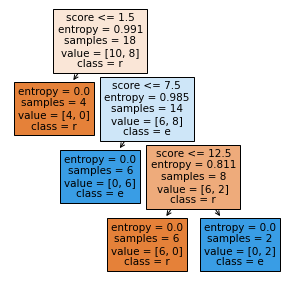

In [151]:
fig1 = plt.figure(figsize=(5,5))
_ = tree.plot_tree(clf, 
                   feature_names=X_train.columns,
                   class_names=df.columns[6], filled=True)


